In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [103]:
result_mat = pd.read_csv("results_by_gamma_beta.csv")

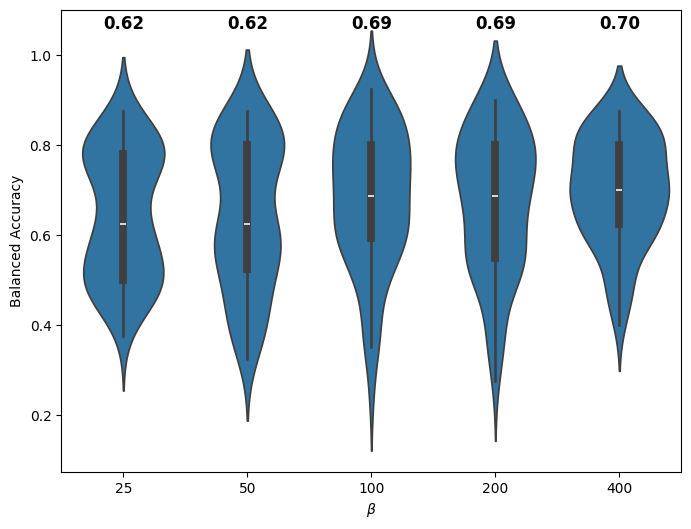

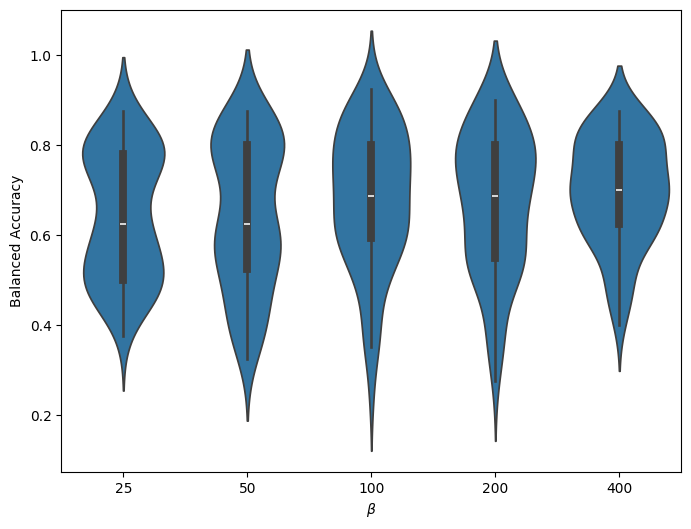

In [104]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='beta', y='score', data=result_mat,inner="box")
plt.xlabel(r"$\beta$")
plt.ylabel("Balanced Accuracy")
means = result_mat.groupby("beta")["score"].median()

for i, mean in enumerate(means):
    plt.text(i, 1.06, f"{mean:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

plt.savefig('boxplot_beta_means.png',dpi=200)

plt.figure(figsize=(8, 6))
sns.violinplot(x='beta', y='score', data=result_mat,inner="box")
plt.xlabel(r"$\beta$")
plt.ylabel("Balanced Accuracy")
means = result_mat.groupby("beta")["score"].median()

plt.savefig('boxplot_beta.png',dpi=200)

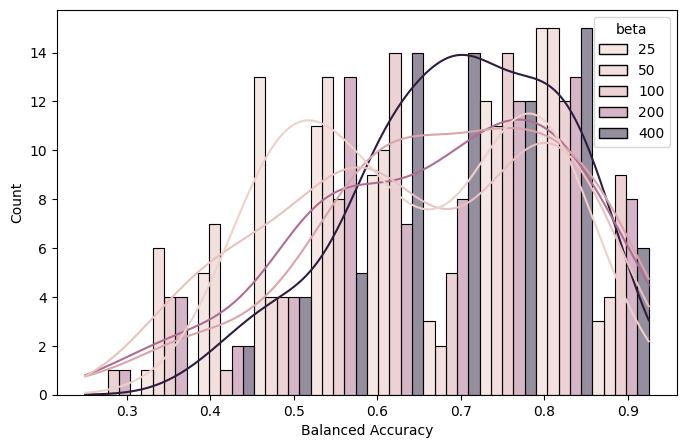

In [105]:
plt.figure(figsize=(8, 5))
sns.histplot(x='score', hue='beta', data=result_mat, kde=True, multiple='dodge')
plt.xlabel("Balanced Accuracy")

plt.savefig("beta_gamma_histograms.png",dpi=200)

In [136]:
corr_df = pd.read_csv("correlation_alternatives/corr.csv",index_col="sort_ind")
corr_df.columns = corr_df.index
corr_df = corr_df.loc[sorted(corr_df.columns),sorted(corr_df.columns)]
dist_corr_df = 1 - np.abs(corr_df)

spearmanr_df = pd.read_csv("correlation_alternatives/spearmanr.csv",index_col="sort_ind")
spearmanr_df.columns = spearmanr_df.index
spearmanr_df = spearmanr_df.loc[sorted(spearmanr_df.columns),sorted(spearmanr_df.columns)]
dist_spearmanr_df = 1 - np.abs(spearmanr_df)

cos_df = pd.read_csv("correlation_alternatives/cos.csv",index_col="sort_ind")
cos_df.columns = cos_df.index
cos_df = cos_df.loc[sorted(cos_df.columns),sorted(cos_df.columns)]
dist_cos_df = 1 - np.abs(cos_df)

euc_df = pd.read_csv("correlation_alternatives/euc.csv",index_col="sort_ind")
euc_df.columns = euc_df.index
euc_df = euc_df.loc[sorted(euc_df.columns),sorted(euc_df.columns)]
dist_euc_df = 1 - np.abs(euc_df)

In [140]:
corr_upper_flattened = []
for i in range(dist_spearmanr_df.shape[0]):
    for j in range(dist_spearmanr_df.shape[1]):
        if j>i:
            corr_upper_flattened.append(dist_corr_df.iloc[i,j])

spearmanr_upper_flattened = []
for i in range(dist_spearmanr_df.shape[0]):
    for j in range(dist_spearmanr_df.shape[1]):
        if j>i:
            spearmanr_upper_flattened.append(dist_spearmanr_df.iloc[i,j])

cos_upper_flattened = []
for i in range(dist_spearmanr_df.shape[0]):
    for j in range(dist_spearmanr_df.shape[1]):
        if j>i:
            cos_upper_flattened.append(dist_cos_df.iloc[i,j])

euc_upper_flattened = []
for i in range(dist_spearmanr_df.shape[0]):
    for j in range(dist_spearmanr_df.shape[1]):
        if j>i:
            euc_upper_flattened.append(dist_euc_df.iloc[i,j])


flattened_df = pd.DataFrame(
    {
        "corr":corr_upper_flattened,
        "spearmanr":spearmanr_upper_flattened,
        "cos":cos_upper_flattened,
        "euc":euc_upper_flattened
    }
)

distance_comparisons = flattened_df.corr()

In [141]:
distance_comparisons.rename(index={'corr':'pearson'}, columns={'corr':'pearson'})

,pearson,spearmanr,cos,euc
pearson,1.000000,0.956221,0.945635,0.927417
spearmanr,0.956221,1.000000,0.918589,0.902758
cos,0.945635,0.918589,1.000000,0.977450
euc,0.927417,0.902758,0.977450,1.000000
